# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
! pip install citipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#print(cities)


632

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Import Open Weather Map Wrapper
import openweathermapy.core as owm

# Set up list and parameters
weather_json = [] #list of json FILES 
params = {'units' : 'imperial', 'appid' : api_key}
    
for i in range(0,len(cities)):
    try:
        weather_json.append(owm.get_current(cities[i], **params))
    except:
        print(f"{i} Record NOT FOUND , SKIP {cities[i]} ")
    print(f"{i} Record FOUND for {cities[i]} ")

0 Record FOUND for vaini 
1 Record FOUND for msanga 
2 Record FOUND for jamestown 
3 Record FOUND for nuoro 
4 Record FOUND for guerrero negro 
5 Record NOT FOUND , SKIP santarem 
5 Record FOUND for santarem 
6 Record FOUND for albany 
7 Record FOUND for punta arenas 
8 Record FOUND for shenjiamen 
9 Record FOUND for mataura 
10 Record FOUND for kabin buri 
11 Record FOUND for ubinskoye 
12 Record FOUND for ushuaia 
13 Record FOUND for busselton 
14 Record FOUND for bredasdorp 
15 Record FOUND for myitkyina 
16 Record FOUND for aichach 
17 Record FOUND for menongue 
18 Record FOUND for port elizabeth 
19 Record FOUND for aguimes 
20 Record FOUND for carnarvon 
21 Record FOUND for kahului 
22 Record FOUND for hailar 
23 Record FOUND for vila franca do campo 
24 Record FOUND for georgetown 
25 Record NOT FOUND , SKIP kazalinsk 
25 Record FOUND for kazalinsk 
26 Record FOUND for techiman 
27 Record FOUND for pahrump 
28 Record FOUND for kodiak 
29 Record FOUND for touros 
30 Record FOUND 

234 Record FOUND for port hedland 
235 Record FOUND for dukat 
236 Record FOUND for pechora 
237 Record FOUND for uvinza 
238 Record FOUND for aktau 
239 Record FOUND for altamira 
240 Record FOUND for narsaq 
241 Record FOUND for constitucion 
242 Record FOUND for kapaa 
243 Record FOUND for mar del plata 
244 Record FOUND for albertville 
245 Record FOUND for boyolangu 
246 Record FOUND for bhag 
247 Record FOUND for dromolaxia 
248 Record FOUND for waddan 
249 Record FOUND for hami 
250 Record FOUND for cumbitara 
251 Record FOUND for hilo 
252 Record FOUND for talnakh 
253 Record FOUND for devils lake 
254 Record FOUND for marsabit 
255 Record FOUND for port-cartier 
256 Record FOUND for dubovka 
257 Record FOUND for songkhla 
258 Record FOUND for norman wells 
259 Record FOUND for lulea 
260 Record FOUND for san javier 
261 Record FOUND for bethel 
262 Record FOUND for zhanakorgan 
263 Record FOUND for saint-georges 
264 Record FOUND for pevek 
265 Record FOUND for vila velha 
266

476 Record FOUND for komsomolskiy 
477 Record FOUND for kununurra 
478 Record FOUND for yarada 
479 Record FOUND for cizre 
480 Record FOUND for casa nova 
481 Record FOUND for nago 
482 Record FOUND for khani 
483 Record FOUND for atikokan 
484 Record FOUND for kamaishi 
485 Record FOUND for ponta delgada 
486 Record FOUND for san joaquin 
487 Record FOUND for ishigaki 
488 Record FOUND for palmer 
489 Record FOUND for karratha 
490 Record FOUND for cooma 
491 Record FOUND for hays 
492 Record FOUND for katsuura 
493 Record NOT FOUND , SKIP vreed en hoop 
493 Record FOUND for vreed en hoop 
494 Record FOUND for dunedin 
495 Record FOUND for wyndham 
496 Record FOUND for jeremie 
497 Record NOT FOUND , SKIP utiroa 
497 Record FOUND for utiroa 
498 Record FOUND for yerbogachen 
499 Record FOUND for college 
500 Record FOUND for oktyabrskoye 
501 Record FOUND for matay 
502 Record FOUND for tuyan 
503 Record NOT FOUND , SKIP camana 
503 Record FOUND for camana 
504 Record FOUND for fare 

In [5]:
# Check how many valid cities
len(weather_json)
#weather_json


566

In [6]:
# Set up variables to capture data
latitude = []
name = []
temp = []
clouds = []
humidity = []
wind = []
country = []

# Loop through JSON to capture data
for i in range(0,len(weather_json)):
    latitude.append(weather_json[i]['coord']['lat'])
    name.append(weather_json[i]['name'])
    temp.append(weather_json[i]['main']['temp'])
    clouds.append(weather_json[i]['clouds']['all'])
    humidity.append(weather_json[i]['main']['humidity'])
    wind.append(weather_json[i]['wind']['speed'])
    country.append(weather_json[i]['sys']['country'])



### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [22]:
# Create a dictionary with all the info collected
weather_dict = {'City': name,
                'Country' : country,
               'Latitude' : latitude,
               'Temperature': temp,
               'Cloudiness %' : clouds,
               'Humidity %': humidity,
               'Wind Speed': wind}

# Create DataFrame and export it to csv file
weather_df = pd.DataFrame(data = weather_dict)
weather_df.to_csv('Weather Data.csv')
weather_df.head()

,City,Country,Latitude,Temperature,Cloudiness %,Humidity %,Wind Speed
0,Punta Arenas,CL,-53.16,41.00,90,93,12.75
1,Mataura,NZ,-46.19,54.00,98,73,1.01
2,Hilo,US,19.71,80.06,40,58,10.29
3,Cape Town,ZA,-33.93,49.77,0,100,1.12
4,Jamestown,AU,-33.21,51.20,15,64,14.36


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

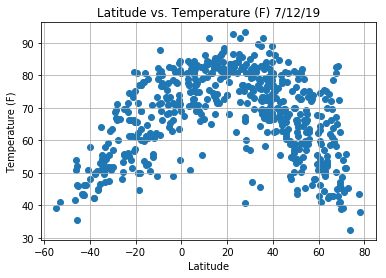

In [26]:
Temperature_Plot = plt.scatter(weather_df['Latitude'], weather_df['Temperature'])

plt.grid()
plt.title('Latitude vs. Temperature (F) 7/12/19')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.savefig('Temperature_Plot.png')

#### Latitude vs. Humidity Plot

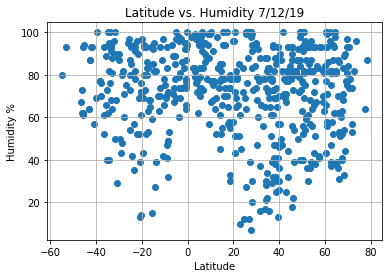

In [28]:
Humidity_Plot = plt.scatter(weather_df['Latitude'], weather_df['Humidity %'])

plt.grid()
plt.title('Latitude vs. Humidity 7/12/19')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.savefig('Humidity %')

#### Latitude vs. Cloudiness Plot

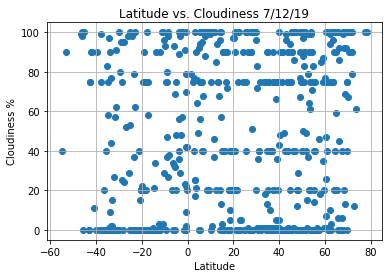

In [29]:
Cloudiness_Plot = plt.scatter(weather_df['Latitude'], weather_df['Cloudiness %'])

plt.grid()
plt.title('Latitude vs. Cloudiness 7/12/19')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.savefig('Cloudiness %')

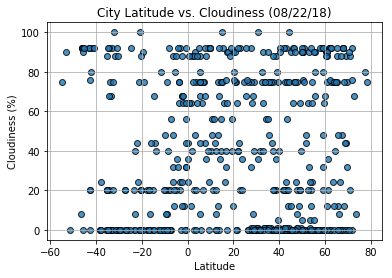

#### Latitude vs. Wind Speed Plot

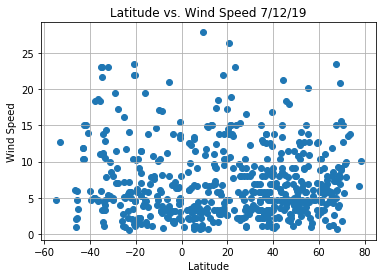

In [35]:
Cloudiness_Plot = plt.scatter(weather_df['Latitude'], weather_df['Wind Speed'])

plt.grid()
plt.title('Latitude vs. Wind Speed 7/12/19')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig('Wind Speed')

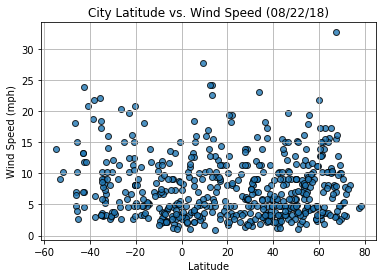